# Fitbit Steps Reader:

## A program for merging your Fitbit .json files into one combined .csv file

By Kenneth Burchfiel

Relaesed under the .MIT license

In [1]:
import time 
start_time = time.time() # Allows the program's runtime to be measured

import os
import pandas as pd
import time
import json
import numpy as np
import matplotlib.pyplot as plt

In order to combine all of your  Fitbit steps data into a single .csv file, you will first need to export your Fitbit account archive. To learn how to do so, go to https://help.fitbit.com/articles/en_US/Help_article/1133.htm; click the "How do I export my Fitbit account data?" text; and then navigate to the "To export a complete archive of your Fitbit account data" section of the guide.

Once this data has been downloaded, navigate to the 'Physical Activity' folder (which I found within MyFitbitData\KennethBurchfiel\\) to retrieve the individual .json steps file. Each file appears to store a 30-day-range of steps. You can either access the .json files directly within that folder, or copy and paste them into the 'original_steps_files' folder within this project.

The following cell combines the individual .json files into one combined .json file. It does so by creating a list (combined_steps_list); opening each .json file; and adding each line of each .json file to combined_steps_list.

In [2]:
folder_with_steps_files = 'original_steps_files' # This can be changed to the location of the 'Physical Activity' folder on your computer.

with open('combined_steps_file.json', "w") as destination_file: # Overwrites what had been in the file 
    # previously
    destination_file.write('[')

combined_steps_list = []

path_list = []
for root, dirs, files in os.walk(top=folder_with_steps_files): # Source: https://docs.python.org/3/library/os.html
    for name in files:
        if ("steps" in name) and ("combined" not in name) and ("daily" not in name) and (".png" not in name): 
            # These statements exclude non-json files from being added to the document
            print("Now adding steps for",name)
            with open(root+'\\'+name) as source_file: # Root+'\\'+name produces strings such as 'original_steps_files\steps-2020-11-14.json'.
                for line in source_file:
                    combined_steps_list.append(line)

Now adding steps for steps-2020-01-19.json
Now adding steps for steps-2020-02-18.json
Now adding steps for steps-2020-03-19.json
Now adding steps for steps-2020-04-18.json
Now adding steps for steps-2020-05-18.json
Now adding steps for steps-2020-06-17.json
Now adding steps for steps-2020-07-17.json
Now adding steps for steps-2020-08-16.json
Now adding steps for steps-2020-09-15.json
Now adding steps for steps-2020-10-15.json
Now adding steps for steps-2020-11-14.json
Now adding steps for steps-2020-12-14.json
Now adding steps for steps-2021-01-13.json
Now adding steps for steps-2021-02-12.json
Now adding steps for steps-2021-03-14.json
Now adding steps for steps-2021-04-13.json
Now adding steps for steps-2021-05-13.json
Now adding steps for steps-2021-06-12.json
Now adding steps for steps-2021-07-12.json
Now adding steps for steps-2021-08-11.json
Now adding steps for steps-2021-09-10.json
Now adding steps for steps-2021-10-10.json
Now adding steps for steps-2021-11-09.json


In [3]:
print(len(combined_steps_list))

1765592


The lines in combined_steps_list will now be written to a new .json file called combined_steps_file.json. 

The following code looks for cases where one of the original .json files
ended and the other began. It then replaces the final line of the first 
file ('}]') and the first line of the new file ('[{') with characters that
match the regular separation between entries (},{). In doing so, the 
resulting file (combined_steps_list) will be seen as one large .json file
rather than a series of individual files. 


In [4]:
with open('combined_steps_file.json', 'w') as file:
    for i in range(len(combined_steps_list)): # E.g. for each line in the file
        if i != (len(combined_steps_list) -1): # If i isn't the final line in the document
            if ((combined_steps_list[i] == '}]') and
            (combined_steps_list[i+1].strip() == '[{')):
                # The above if statement will return true if i represented the last 
                # line of one .json file and i+1 represented the first line of a new one.
                # In this case, these endings need to be changed so that Python will
                # recognize them both as part of the same .json file.
                # There was a 3rd character, probably a space, in these lines,
                # hence the use of the strip() function.
                # print('Condition met')
                combined_steps_list[i] = '},'
                combined_steps_list[i+1] = '{'
        file.write(combined_steps_list[i])

The .json file will now be converted to a DataFrame.

In [5]:
df_steps = pd.io.json.read_json('combined_steps_file.json')
df_steps.rename(columns={'value':'steps'},inplace=True) 
# See https://pandas.pydata.org/docs/reference/api/pandas.io.json.read_json.html
df_steps.sort_index(inplace=True) # Probably not necessary
df_steps
    

,dateTime,steps
0,2020-01-20 19:05:00,0
1,2020-01-20 19:38:00,0
2,2020-01-20 19:39:00,0
3,2020-01-20 19:40:00,0
4,2020-01-20 19:41:00,61
...,...,...
588518,2021-11-19 18:42:00,0
588519,2021-11-19 18:43:00,0
588520,2021-11-19 18:44:00,0
588521,2021-11-19 18:45:00,0


Each row in the file appears to represent a single minute of steps. I don't need a minute-by-minute comparison of my steps (a daily comparison will do), so I'll use the resample() Pandas function to create a DataFrame (df_daily_steps) with one row per day.

In [6]:
df_daily_steps = df_steps.resample('D',on='dateTime').sum()
df_daily_steps.sort_index(inplace=True) # Probably not necessary
# See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
df_daily_steps

,steps
dateTime,
2020-01-20,166
2020-01-21,4324
2020-01-22,7259
2020-01-23,8154
2020-01-24,15363
...,...
2021-11-15,11696
2021-11-16,12117
2021-11-17,7723


In [19]:
df_daily_steps

,steps,7_day_avg
Date,,
2020-01-20,166,NaN
2020-01-21,4324,NaN
2020-01-22,7259,NaN
2020-01-23,8154,NaN
2020-01-24,15363,NaN
...,...,...
2021-11-15,11696,9438.142857
2021-11-16,12117,10624.428571
2021-11-17,7723,10546.285714


I can see the days with my highest step count as follows:

In [7]:
df_daily_steps.sort_values('steps',ascending=False)[0:10]

,steps
dateTime,
2021-04-29,26389
2021-04-30,23897
2021-06-27,22691
2021-05-01,21591
2021-06-06,21352
2021-04-10,21339
2021-05-22,21080
2021-03-27,20652
2021-09-25,19328


The following code block adds a 7-day rolling average to df_daily_steps; renames the index; and then saves the DataFrame as a .csv file.

In [8]:
df_daily_steps['7_day_avg'] = df_daily_steps.rolling(7).mean()
df_daily_steps.index.rename('Date',inplace=True)
df_daily_steps.to_csv('daily_steps.csv')
df_daily_steps

,steps,7_day_avg
Date,,
2020-01-20,166,NaN
2020-01-21,4324,NaN
2020-01-22,7259,NaN
2020-01-23,8154,NaN
2020-01-24,15363,NaN
...,...,...
2021-11-15,11696,9438.142857
2021-11-16,12117,10624.428571
2021-11-17,7723,10546.285714


The following code lets me see my highest 7-day step count averages.

In [9]:
df_daily_steps.sort_values('7_day_avg',ascending=False)[0:10]

,steps,7_day_avg
Date,,
2021-05-04,8569,17311.142857
2021-05-03,9294,17045.714286
2021-05-02,17058,16855.857143
2021-05-05,5260,16008.285714
2021-05-01,21591,15279.000000
2021-05-06,8583,13464.571429
2021-11-02,16500,13219.428571
2021-04-30,23897,13136.285714
2021-11-03,8152,12871.142857


I can also resample the data by week to get weekly step totals:

In [10]:
df_weekly_steps = df_steps.resample('W',on='dateTime').sum()
# See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html#pandas.Series.resample

In [11]:
df_weekly_steps

,steps
dateTime,
2020-01-26,57359
2020-02-02,77256
2020-02-09,48192
2020-02-16,34599
2020-02-23,53174
...,...
2021-10-24,56092
2021-10-31,80635
2021-11-07,64208


In [12]:
df_weekly_steps.sort_values('steps',ascending=False)[0:10]

,steps
dateTime,
2021-05-02,117991
2021-09-26,86979
2021-09-19,82804
2021-10-31,80635
2021-09-12,79036
2021-06-06,77990
2020-02-02,77256
2021-09-05,74726
2021-07-11,69243


In [13]:
len(df_weekly_steps)

96

Next, I will create graphs showing my daily and weekly step counts. I will first create a list of formatted dates for inclusion in my weekly steps chart.

In [14]:
formatted_dates = []
for i in range(len(df_weekly_steps)):
    formatted_dates.append(df_weekly_steps.index[i].strftime("%Y-%m-%d"))
    # See https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
# formatted_dates

Next, I'll create a weekly steps chart and save it in .png format.

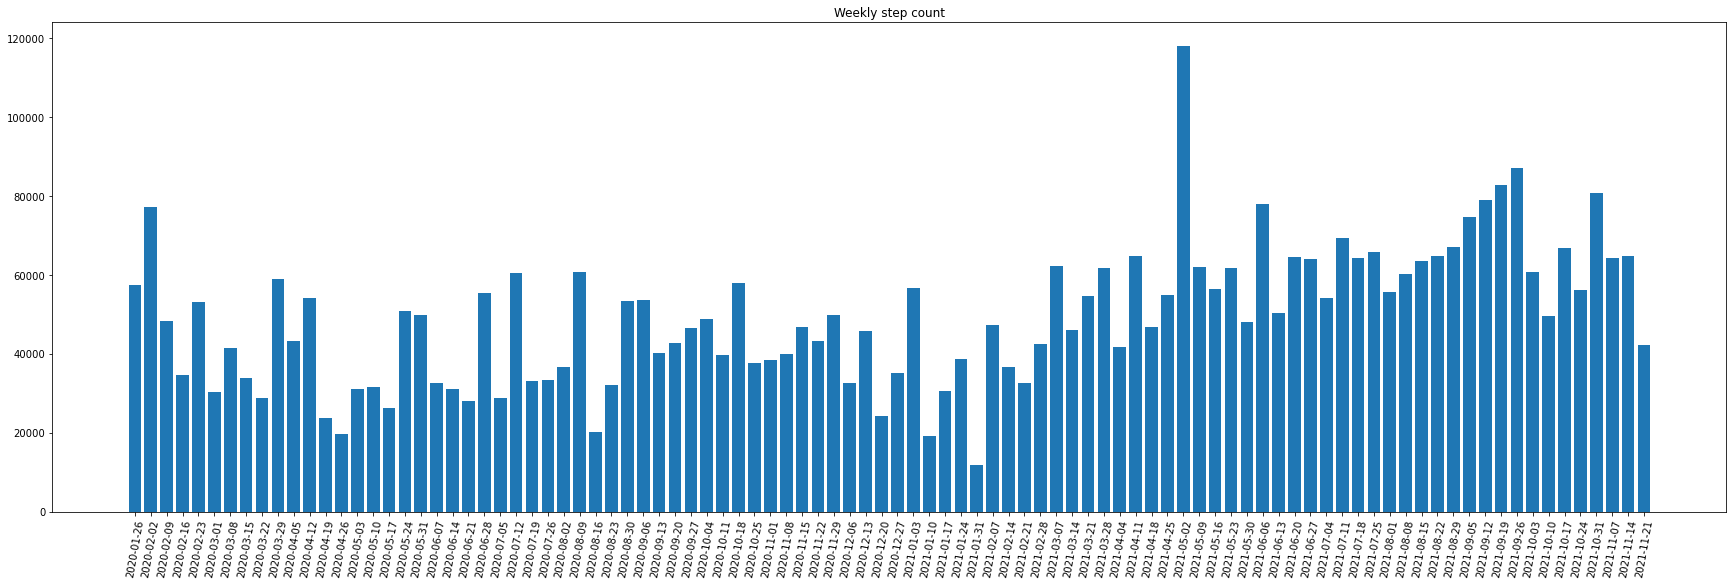

In [15]:
fig, ax = plt.subplots(figsize=[30,9]) # Making the chart wider allows all dates to appear on the graph.
fig.set_facecolor('white')
xrange = np.arange(len(df_weekly_steps))
weekly_step_graph = plt.bar(x = xrange, height=df_weekly_steps['steps']) # df_weekly_steps.index can also be used in place of x, but this messes with the chart's appearance
# See https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html for 
# Matplotlib's bar chart documentation
plt.xticks(np.arange(len(df_weekly_steps)), formatted_dates, rotation=80) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
plt.title('Weekly step count')
plt.savefig('graphs\\weekly_steps.png',dpi=400)

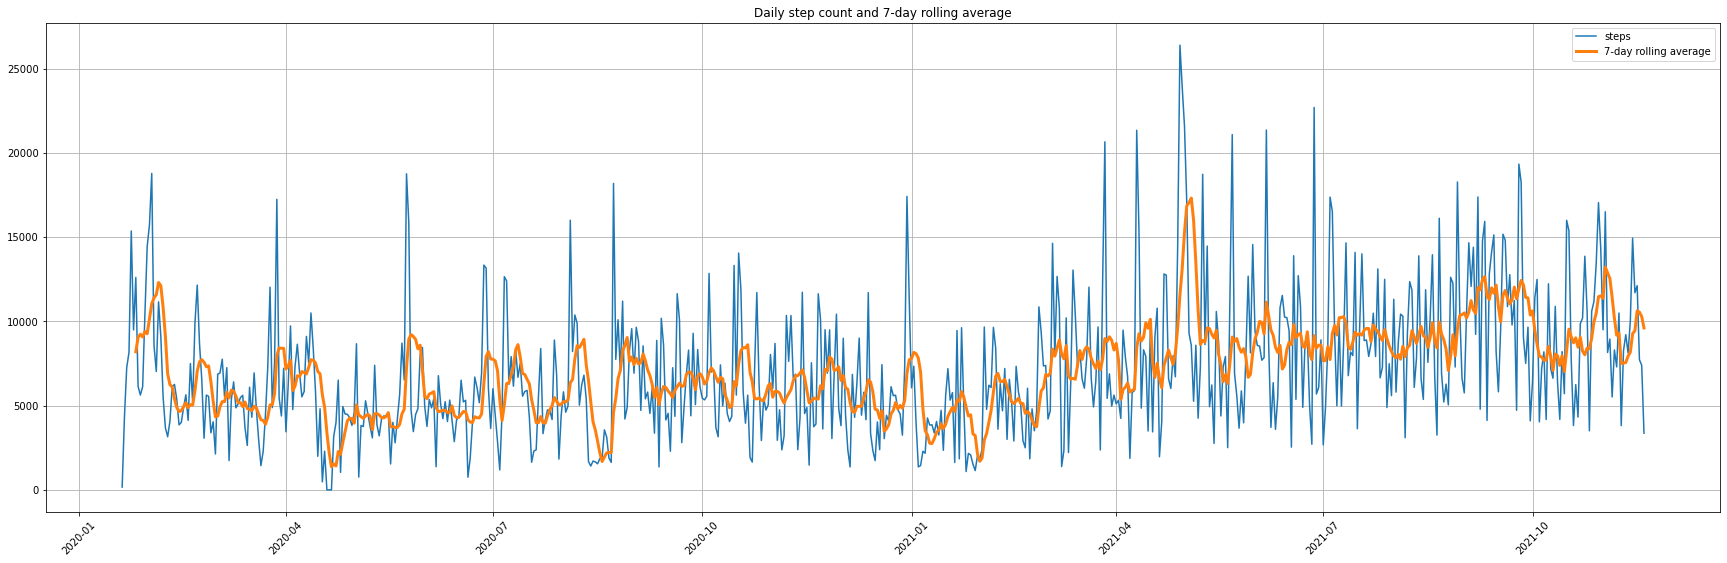

In [16]:
fig, ax = plt.subplots(figsize=[30,9])
plt.plot(df_daily_steps['steps'], label = 'steps')
plt.plot(df_daily_steps['7_day_avg'], label = '7-day rolling average', lw = 3)
fig.set_facecolor('white')
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.title('Daily step count and 7-day rolling average')
plt.savefig('graphs\\daily_steps.png',dpi=400)

In total, I have logged the following number of steps with my Fitbit:

In [17]:
print(sum(df_steps['steps']))

4746632


That's it for this program. I hope you will find this code useful in analyzing your own Fitbit steps data.

In [18]:
end_time = time.time()
run_time = end_time - start_time
run_minutes = run_time // 60
run_seconds = run_time % 60
print("Completed run at",time.ctime(end_time),"(local time)")
print("Total run time:",'{:.2f}'.format(run_time),"second(s) ("+str(run_minutes),"minute(s) and",'{:.2f}'.format(run_seconds),"second(s))") # Only meaningful when the program is run nonstop from start to finish

Completed run at Fri Nov 19 15:02:19 2021 (local time)
Total run time: 45.19 second(s) (0.0 minute(s) and 45.19 second(s))
